In [236]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [237]:
df = pd.read_csv('store_data.csv', header=None)
df = df.astype(str)
df = df.values.tolist() # Prepare df format to be compatable with apriori's expected input

In [238]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
store_list = encoder.fit_transform(df) # IneHotEncode all valyes and change values to true and false
store_list = pd.DataFrame(store_list, columns=encoder.columns_)
store_list = store_list.drop('nan', axis = 1)
store_list

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [239]:
from mlxtend.frequent_patterns import apriori

# Get the apriori combination of items
frequent_itemsets = apriori(store_list, min_support=0.038, use_colnames=True)

# Add a length column indicating how many items are in the itemset
frequent_itemsets['number_of_items_in_itemset'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Sort dataframe
frequent_itemsets = frequent_itemsets.sort_values(by='number_of_items_in_itemset', ascending=False, ignore_index=True)

frequent_itemsets

,support,itemsets,number_of_items_in_itemset
0,0.059725,"(spaghetti, mineral water)",2
1,0.047994,"(mineral water, milk)",2
2,0.039195,"(spaghetti, ground beef)",2
3,0.040928,"(mineral water, ground beef)",2
4,0.050927,"(mineral water, eggs)",2
5,0.039195,"(spaghetti, chocolate)",2
6,0.052660,"(mineral water, chocolate)",2
7,0.050527,(soup),1
8,0.065858,(olive oil),1
9,0.095054,(pancakes),1


In [240]:
# Get association rules
from mlxtend.frequent_patterns import association_rules

rules = association_rules(df=frequent_itemsets, metric='lift', min_threshold=1)

rules = rules.sort_values(by='lift', ascending=False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
5,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
6,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
2,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
3,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
0,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
1,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
10,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070,0.329550
11,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581,0.325505


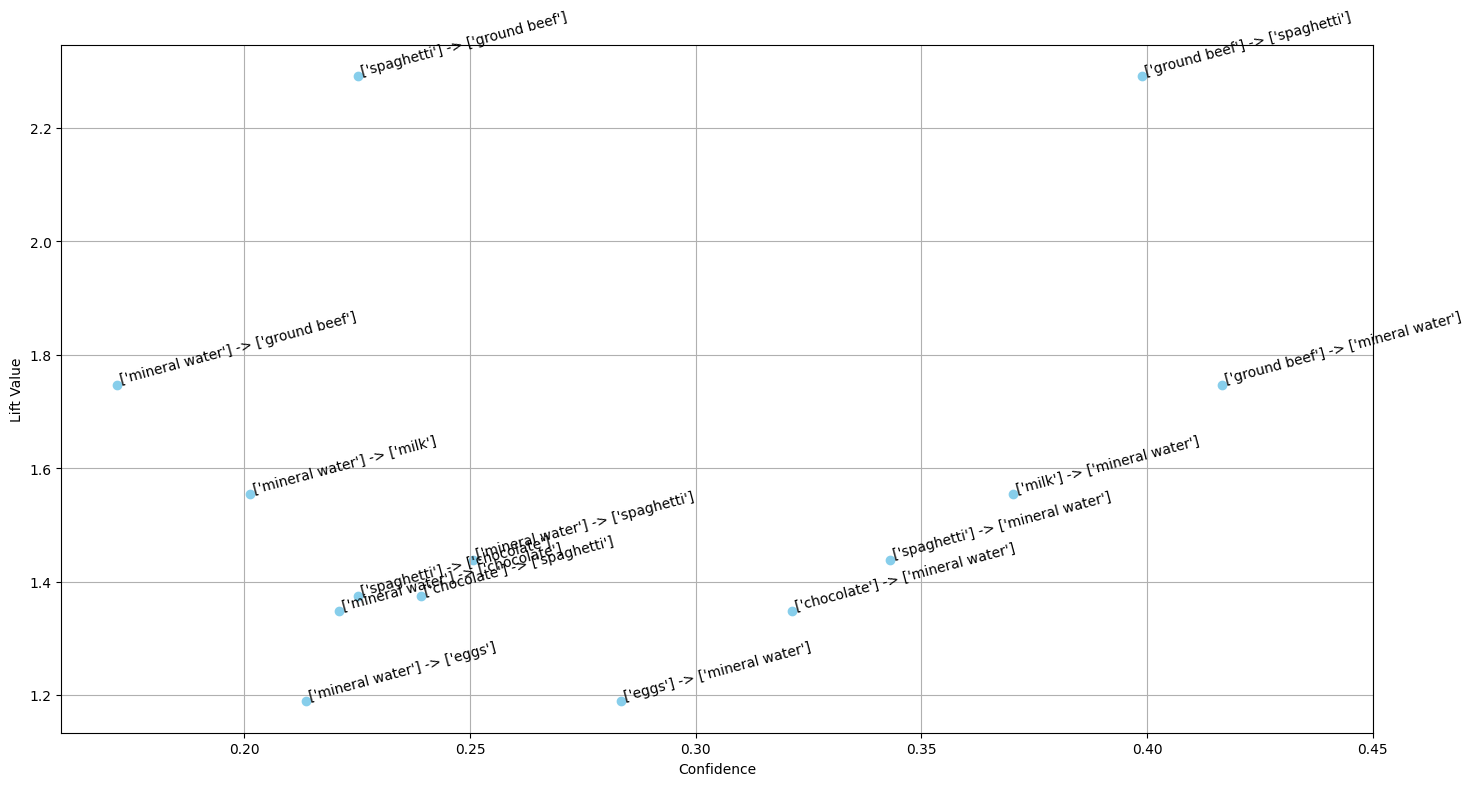

In [243]:
import matplotlib.pyplot as plt
import numpy as np

antecedents = rules['antecedents'].values
consequents = rules['consequents'].values
confidence_values = rules['confidence'].values
lift_values = rules['lift'].values

# Plotting
plt.figure(figsize=(15, 8))
plt.scatter(confidence_values, lift_values, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Lift Value')

# Set custom x-ticks positions and labels
plt.xticks(np.arange(0.2, 0.5, 0.05))

for i, txt in enumerate(zip(antecedents, consequents)):
    plt.annotate(f'{list(txt[0])} -> {list(txt[1])}', (confidence_values[i], lift_values[i]), xytext=(1,1), textcoords='offset points', rotation=15)

plt.grid(True)
plt.tight_layout()
plt.show()
